### Ejercicio Clase 2: Mini Batch y First Order Momentum

### Alumno: Lucas Rivela

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [262]:
X = np.linspace(-7, 7, 1000)

In [263]:
# Ecuacion Original
y = -( X - 3)**2 + 2 + 0.1 * np.sin( 10*X *np.pi/180 )

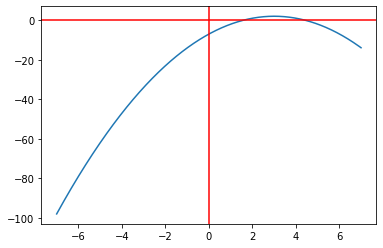

In [273]:
plt.plot(X, y)
plt.axhline(0, color='red')
plt.axvline(0, color='red')

In [265]:
# Hiperparametros
n_epochs = 1000
alfa = 0.001
batches = 10

In [266]:
w1 = random.uniform(0, 1)
w2 = random.uniform(0, 1)
b = random.uniform(0, 1)
print(w1, w2, b)

0.12355771956475925 0.008118434040653044 0.5134128550038914


In [137]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.vstack((X,y))
    data = data.T
    for i in range(0, data.shape[0], batch_size):
        mini_batch = np.array(data[i: i + batch_size,])
        mini_batches.append(mini_batch)
    
    return mini_batches

In [138]:
def calculate_y_hat(X, w1, w2, b):
    y_hat = w1*(X**2) + w2*(X) + [b] * len(X)
    return y_hat

In [139]:
def calculate_loss_w1(err, X_batch):
    loss = -2 * err * (X_batch**2)
    return np.sum(loss) / len(X_batch)


In [140]:
def calculate_loss_w2(err, X_batch):
    loss = -2 * err * X_batch
    return np.sum(loss) / len(X_batch)

In [141]:
def calculate_loss_b(err, X_batch):
    loss = -2 * err
    return np.sum(loss) / len(X_batch)

#### Mini Batch

In [267]:
batch_list = create_mini_batches(X, y, batches)
ecm = []
for e in range(n_epochs):
    mse_batch = 0
    for batch in batch_list:
        y_hat = calculate_y_hat(batch[:,0], w1, w2, b)
        err = (batch[:,1] - y_hat)
        loss_w1 = calculate_loss_w1(err, batch[:,0])
        loss_w2 = calculate_loss_w2(err, batch[:,0])
        loss_b = calculate_loss_b(err, batch[:,0])
        w1 = w1 - alfa * loss_w1
        w2 = w2 - alfa * loss_w2
        b = b - alfa * loss_b
        mse_batch += np.sum(err ** 2) / batch.shape[0]
    ecm.append(mse_batch)
        

In [268]:
print(w1, w2, b)

-1.0004247133176472 6.016397631003244 -7.000230804050299


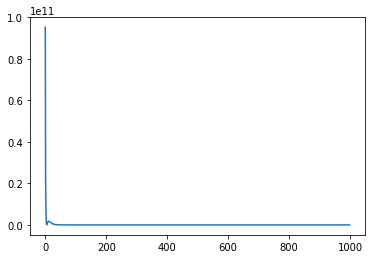

In [269]:
plt.plot(range(n_epochs), ecm)

In [270]:
y_ = -( np.array([1,2]) - 3)**2 + 2 + 0.1 * np.sin( 10*np.array([1,2]) *np.pi/180 )
print(y_)

y_hat = calculate_y_hat(np.array([1,2]), w1, w2, b)
print(y_hat)

[-1.98263518  1.03420201]
[-1.98425789  1.0308656 ]


#### First Order Momentum

In [303]:
# Hiperparametros
n_epochs = 150
alfa = 0.001
batches = 10
epsilon = 0.1

In [304]:
w1 = random.uniform(0, 1)
w2 = random.uniform(0, 1)
b = random.uniform(0, 1)
print(w1, w2, b)

0.6525993757124104 0.08033765398293724 0.6095831812374934


In [305]:
batch_list = create_mini_batches(X, y, batches)
ecm = []
for e in range(n_epochs):
    change_w1 = 0
    change_w2 = 0
    change_b = 0
    mse_batch = 0
    for batch in batch_list:
        y_hat = calculate_y_hat(batch[:,0], w1, w2, b)
        err = (batch[:,1] - y_hat)
        loss_w1 = calculate_loss_w1(err, batch[:,0])
        loss_w2 = calculate_loss_w2(err, batch[:,0])
        loss_b = calculate_loss_b(err, batch[:,0])
        
        new_change_w1 = ( alfa * loss_w1 + epsilon * change_w1 )
        new_change_w2 = ( alfa * loss_w2 + epsilon * change_w2 )
        new_change_b = ( alfa * loss_b + epsilon * change_b )
        
        w1 = w1 - new_change_w1
        w2 = w2 - new_change_w2
        b = b - new_change_b

        change_w1 = new_change_w1
        change_w2 = new_change_w2
        change_b = new_change_b

        mse_batch += np.sum(err ** 2) / batch.shape[0]
    ecm.append(mse_batch)

In [306]:
print(w1, w2, b)

-1.0004505397180958 6.016528635425495 -6.999882755631922


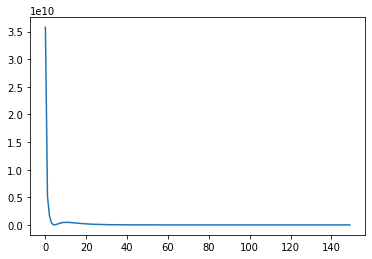

In [307]:
plt.plot(range(n_epochs), ecm)

In [308]:
y_ = -( np.array([1,2]) - 3)**2 + 2 + 0.1 * np.sin( 10*np.array([1,2]) *np.pi/180 )
print(y_)

y_hat = calculate_y_hat(np.array([1,2]), w1, w2, b)
print(y_hat)

[-1.98263518  1.03420201]
[-1.98380466  1.03137236]


#### Conclusiones

Mini batch con Momentum solo necesitó 150 epochs vs las 1000 que se necesitaron para entrenar el mini batch común.